In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib as plt
import time
import matplotlib.pyplot as plt


In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

TASK 6 - TRAIN CNN on Fashin MNIST


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


100%|██████████| 26421880/26421880 [00:01<00:00, 13260238.65it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210012.63it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3931485.54it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22848970.36it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:

class FashionMNISTmodel(nn.Module):
    def __init__(self):
        super(FashionMNISTmodel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 7 * 7, 128)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(128, 128)
        self.relu4 = nn.ReLU()

        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x
start_time = time.time()

model = FashionMNISTmodel().to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
accuracy_0_9_fashion_mnist = []
n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_0_9_fashion_mnist.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0: model accuracy 88.38%
Epoch 1: model accuracy 89.35%
Epoch 2: model accuracy 90.77%
Epoch 3: model accuracy 92.01%
Epoch 4: model accuracy 94.18%
Epoch 5: model accuracy 94.28%
Epoch 6: model accuracy 95.23%
Epoch 7: model accuracy 95.50%
Epoch 8: model accuracy 96.59%
Epoch 9: model accuracy 97.35%
Epoch 10: model accuracy 97.50%
Epoch 11: model accuracy 96.97%
Epoch 12: model accuracy 97.48%
Epoch 13: model accuracy 98.69%
Epoch 14: model accuracy 98.44%
Epoch 15: model accuracy 98.57%
Epoch 16: model accuracy 98.92%
Epoch 17: model accuracy 98.39%
Epoch 18: model accuracy 98.71%
Epoch 19: model accuracy 98.62%
482.10972452163696


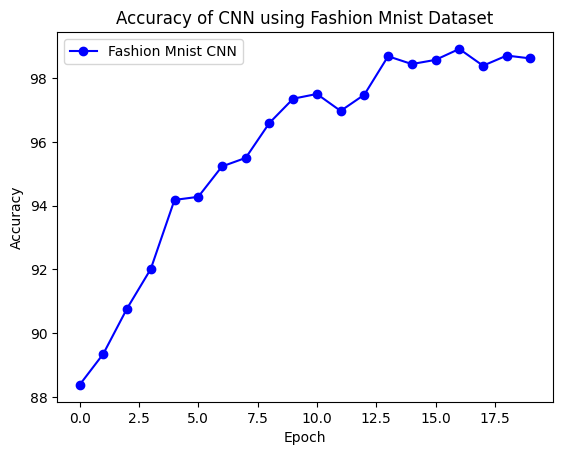

In [13]:

# Extract the accuracy values
accuracies_0_9_fashion_mnist = [val[1].cpu().numpy() for val in accuracy_0_9_fashion_mnist]

# Plotting

plt.plot([i for i in range(len(accuracies_0_9_fashion_mnist))], accuracies_0_9_fashion_mnist, color='blue', marker='o', label='Fashion Mnist CNN')



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of CNN using Fashion Mnist Dataset')
plt.legend()
plt.show()

TASK 7 - TRAIN CNN ON CIFAR 10

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib as plt
import time

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)



Files already downloaded and verified
Files already downloaded and verified


In [20]:

class CIFAR10Model(nn.Module):
    def __init__(self):
        super(CIFAR10Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 8 * 8, 128)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(128, 128)
        self.relu4 = nn.ReLU()

        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x
start_time = time.time()

model = CIFAR10Model().to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
accuracy_0_9 = []
n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_0_9.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

Epoch 0: model accuracy 52.74%
Epoch 1: model accuracy 65.83%
Epoch 2: model accuracy 72.98%
Epoch 3: model accuracy 78.33%
Epoch 4: model accuracy 83.50%
Epoch 5: model accuracy 87.99%
Epoch 6: model accuracy 89.72%
Epoch 7: model accuracy 90.79%
Epoch 8: model accuracy 95.28%
Epoch 9: model accuracy 94.99%
Epoch 10: model accuracy 95.47%
Epoch 11: model accuracy 95.75%
Epoch 12: model accuracy 96.50%
Epoch 13: model accuracy 97.91%
Epoch 14: model accuracy 97.25%
Epoch 15: model accuracy 98.04%
Epoch 16: model accuracy 98.27%
Epoch 17: model accuracy 97.61%
Epoch 18: model accuracy 98.68%
Epoch 19: model accuracy 97.53%
470.68903279304504


(20,)


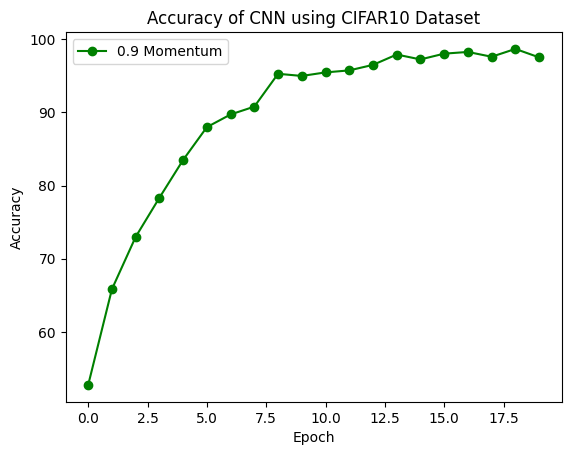

In [27]:

# Extract the accuracy values
accuracies_0_9 = [val[1].cpu().numpy() for val in accuracy_0_9]
print(np.shape(accuracies_0_9))

# Plotting
plt.plot([i for i in range(len(accuracies_0_9))], accuracies_0_9, color='green', marker='o', label='0.9 Momentum')



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of CNN using CIFAR10 Dataset')
plt.legend()
plt.show()

TASK 8 - OPTIMIZE CNN ON CIFAR WITH DIFFERENT LEARNING RATES

In [32]:
start_time = time.time()

model = CIFAR10Model().to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0)
accuracy_0 = []
n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_0.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

Epoch 0: model accuracy 26.09%
Epoch 1: model accuracy 39.85%
Epoch 2: model accuracy 46.73%
Epoch 3: model accuracy 52.98%
Epoch 4: model accuracy 50.56%
Epoch 5: model accuracy 59.48%
Epoch 6: model accuracy 60.33%
Epoch 7: model accuracy 64.49%
Epoch 8: model accuracy 67.16%
Epoch 9: model accuracy 70.58%
Epoch 10: model accuracy 72.94%
Epoch 11: model accuracy 73.34%
Epoch 12: model accuracy 73.02%
Epoch 13: model accuracy 71.40%
Epoch 14: model accuracy 79.62%
Epoch 15: model accuracy 79.33%
Epoch 16: model accuracy 84.04%
Epoch 17: model accuracy 83.15%
Epoch 18: model accuracy 85.70%
Epoch 19: model accuracy 88.51%
465.3555357456207


In [46]:
start_time = time.time()

model = CIFAR10Model().to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=2)
accuracy_2 = []
n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_2.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0: model accuracy 10.00%
Epoch 1: model accuracy 10.00%
Epoch 2: model accuracy 10.00%
Epoch 3: model accuracy 10.00%
Epoch 4: model accuracy 10.00%
Epoch 5: model accuracy 10.00%
Epoch 6: model accuracy 10.00%
Epoch 7: model accuracy 10.00%
Epoch 8: model accuracy 10.00%
Epoch 9: model accuracy 10.00%
Epoch 10: model accuracy 10.00%
Epoch 11: model accuracy 10.00%
Epoch 12: model accuracy 10.00%
Epoch 13: model accuracy 10.00%
Epoch 14: model accuracy 10.00%
Epoch 15: model accuracy 10.00%
Epoch 16: model accuracy 10.00%
Epoch 17: model accuracy 10.00%
Epoch 18: model accuracy 10.00%
Epoch 19: model accuracy 10.00%
479.0539267063141


In [47]:
start_time = time.time()

model = CIFAR10Model().to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
accuracy_0_5= []
n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_0_5.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0: model accuracy 39.52%
Epoch 1: model accuracy 49.41%
Epoch 2: model accuracy 55.79%
Epoch 3: model accuracy 60.34%
Epoch 4: model accuracy 64.40%
Epoch 5: model accuracy 70.63%
Epoch 6: model accuracy 73.68%
Epoch 7: model accuracy 74.95%
Epoch 8: model accuracy 77.71%
Epoch 9: model accuracy 79.83%
Epoch 10: model accuracy 83.66%
Epoch 11: model accuracy 87.53%
Epoch 12: model accuracy 89.72%
Epoch 13: model accuracy 87.54%
Epoch 14: model accuracy 92.52%
Epoch 15: model accuracy 93.82%
Epoch 16: model accuracy 96.65%
Epoch 17: model accuracy 95.12%
Epoch 18: model accuracy 95.82%
Epoch 19: model accuracy 97.52%
470.50572514533997


In [38]:
accuracy_ADAM = []
start_time = time.time()

model = CIFAR10Model().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    accuracy_ADAM.append((epoch, acc*100))
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

Epoch 0: model accuracy 32.60%
Epoch 1: model accuracy 38.73%
Epoch 2: model accuracy 42.98%
Epoch 3: model accuracy 43.33%
Epoch 4: model accuracy 44.70%
Epoch 5: model accuracy 44.72%
Epoch 6: model accuracy 45.52%
Epoch 7: model accuracy 45.65%
Epoch 8: model accuracy 48.04%
Epoch 9: model accuracy 47.05%
Epoch 10: model accuracy 49.18%
Epoch 11: model accuracy 48.13%
Epoch 12: model accuracy 51.15%
Epoch 13: model accuracy 50.14%
Epoch 14: model accuracy 50.34%
Epoch 15: model accuracy 50.94%
Epoch 16: model accuracy 50.93%
Epoch 17: model accuracy 52.45%
Epoch 18: model accuracy 51.15%
Epoch 19: model accuracy 52.82%
461.28720021247864


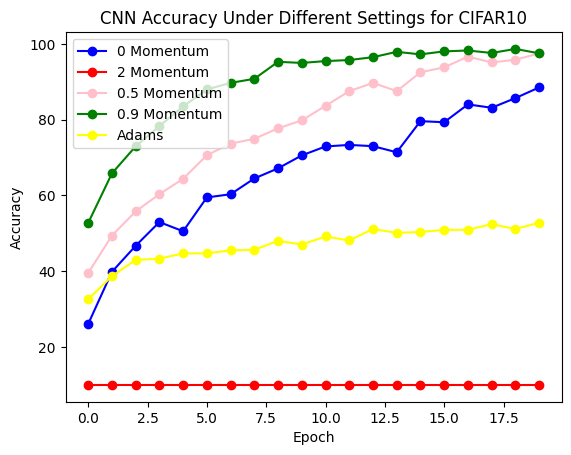

In [51]:
import matplotlib.pyplot as plt

# Extract the accuracy values
accuracies_0 = [val[1].cpu().numpy() for val in accuracy_0]
accuracies_2 = [val[1].cpu().numpy() for val in accuracy_2]
accuracies_0_9 = [val[1].cpu().numpy() for val in accuracy_0_9]
accuracies_ADAM = [val[1].cpu().numpy() for val in accuracy_ADAM]
accuracies_0_5 = [val[1].cpu().numpy() for val in accuracy_0_5]


# Plotting
plt.plot([i for i in range(len(accuracies_0))], accuracies_0, color='blue', marker='o', label='0 Momentum')
plt.plot([i for i in range(len(accuracies_2))], accuracies_2, color='red', marker='o', label='2 Momentum')
plt.plot([i for i in range(len(accuracies_0_5))], accuracies_0_5, color='pink', marker='o', label='0.5 Momentum')
plt.plot([i for i in range(len(accuracies_0_9))], accuracies_0_9, color='green', marker='o', label='0.9 Momentum')
plt.plot([i for i in range(len(accuracies_ADAM))], accuracies_ADAM, color='yellow', marker='o', label='Adams')



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Under Different Settings for CIFAR10')
plt.legend()
plt.show()